In [2]:
# Importing libraries that are used in our code
import numpy as np
import pandas as pd
from numpy import log2
import random
from collections import Counter
from matplotlib import pyplot as plt

In [3]:

# function that open the data set 
def OpenDataSet(file = "rain_predict_train.csv"):
    
    df = pd.read_csv(file)
    df = df.drop(['riskmm'], axis=1)
    return df

data_set = OpenDataSet("rain_predict_train.csv")
data_set.head()

mint  maxt  rainfall windd3  winds9  winds3  hum9  hum3   pres9   pres3  \
0   7.4  25.1       0.0    WSW       4      22    44    25  1010.6  1007.8   
1  12.9  25.7       0.0    WSW      19      26    38    30  1007.6  1008.7   
2   9.2  28.0       0.0      E      11       9    45    16  1017.6  1012.8   
3  17.5  32.3       1.0     NW       7      20    82    33  1010.8  1006.0   
4  14.6  29.7       0.2      W      19      24    55    23  1009.2  1005.4   

   temp9  temp3 rain raint  
0   17.2   24.3   No    No  
1   21.0   23.2   No    No  
2   18.1   26.5   No    No  
3   17.8   29.7   No    No  
4   20.6   28.9   No    No

In [4]:
# Function that modify the categorical data 
def Modify_categorical_dataSet(data_set):

    # Convert "Yes" -> 1 and "No" -> 0 in rain and raint feature
    data_set['rain'] = data_set['rain'].replace({'Yes': 1, 'No' : 0})
    data_set['raint'] = data_set['raint'].replace({'Yes': 1, 'No' : 0})

    # Convert "wind3" feature with there index value
    data_set['windd3'] = data_set['windd3'].replace({
        # ['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        #    'SSW', 'SW', 'W', 'WNW', 'WSW']
        'E' : 0,
        'ENE' : 1,
        'ESE' : 2,
        'N' : 3,
        'NE' : 4, 
        'NNE' : 5, 
        'NNW' : 6, 
        'NW' : 7, 
        'S' : 8, 
        'SE' : 9, 
        'SSE' : 10,
        'SSW' : 11, 
        'SW' : 12, 
        'W' : 13, 
        'WNW' : 14, 
        'WSW' : 15
    })

    return data_set

# data_set = Modify_categorical_dataSet(data_set)
# data_set.head()

In [5]:
def modify_winds9(data_set):

    new_winds9 = []

    for i in range(len(data_set['winds9'])):

        if data_set['winds9'][i] >= 35:
            new_winds9.append(0)

        elif data_set['winds9'][i] >= 22 and data_set['winds9'][i] <= 31 or data_set['winds9'][i] in (2, 4):
            new_winds9.append(1)

        else:
            new_winds9.append(2)

    data_set['new_winds9'] = new_winds9
    data_set = data_set.drop(['winds9'], axis=1)

    return data_set

In [6]:
def modify_winds3(data_set):

    new_winds3 = []

    for i in range(len(data_set['winds3'])):

        if data_set['winds3'][i] >= 4 and data_set['winds3'][i] <= 35:
            new_winds3.append(0)

        else:
            new_winds3.append(2)

    data_set['new_winds3'] = new_winds3
    data_set = data_set.drop(['winds3'], axis=1)

    return data_set

In [7]:
def modify_hum9(data_set):

    new_hum9 = []

    for i in range(len(data_set['hum9'])):

        if data_set['hum9'][i] >= 0 and data_set['hum9'][i] <= 24:
            new_hum9.append(0)

        elif data_set['hum9'][i] >= 25 and data_set['hum9'][i] <= 49:
            new_hum9.append(1)
        
        elif data_set['hum9'][i] >= 50 and data_set['hum9'][i] <= 74:
            new_hum9.append(2)

        else:
            new_hum9.append(3)

    data_set['new_hum9'] = new_hum9
    data_set = data_set.drop(['hum9'], axis=1)

    return data_set

In [8]:
def modify_hum3(data_set):

    new_hum3 = []

    for i in range(len(data_set['hum3'])):

        if data_set['hum3'][i] >= 0 and data_set['hum3'][i] <= 50:
            new_hum3.append(0)

        else:
            new_hum3.append(1)

    data_set['new_hum3'] = new_hum3
    data_set = data_set.drop(['hum3'], axis=1)

    return data_set

In [9]:
def modify_mint(data_set):
    new_mint = []

    for i in range(len(data_set['mint'])):

        if float(data_set['mint'][i]) >= -8.2 and float(data_set['mint'][i]) <= 0.0 or float(data_set['mint'][i]) >= 25.4 and float(data_set['mint'][i]) <= 33.9:
            new_mint.append(0)
        
        elif float(data_set['mint'][i]) >= 0.1 and float(data_set['mint'][i]) <= 4.0 or float(data_set['mint'][i]) >= 20.8 and float(data_set['mint'][i]) <= 25.3:
            new_mint.append(1)
        
        elif float(data_set['mint'][i]) >= 4.1 and float(data_set['mint'][i]) <= 7.2 or float(data_set['mint'][i]) >= 15.0 and float(data_set['mint'][i]) <= 20.7:
            new_mint.append(2)
        
        else:
            new_mint.append(3)
        
    data_set['new_mint'] = new_mint
    data_set = data_set.drop(['mint'], axis=1)

    return data_set

In [10]:
def modify_maxt(data_set):
    new_maxt = []

    for i in range(len(data_set['maxt'])):

        if float(data_set['maxt'][i]) >= 2.6 and float(data_set['maxt'][i]) <= 11.2 or float(data_set['maxt'][i]) >= 36.4 and float(data_set['maxt'][i]) <= 48.1:
            new_maxt.append(0)
        
        elif float(data_set['maxt'][i]) >= 11.3 and float(data_set['maxt'][i]) <= 15.6 or float(data_set['maxt'][i]) >= 26.8 and float(data_set['maxt'][i]) <= 36.3:
            new_maxt.append(1)
        
        else:
            new_maxt.append(2)
        
    data_set['new_maxt'] = new_maxt
    data_set = data_set.drop(['maxt'], axis=1)

    return data_set

In [11]:
def modify_pres9(data_set):
    
    new_pres9 = []

    for i in range(len(data_set['pres9'])):

        if float(data_set['pres9'][i]) >= 980.5 and float(data_set['pres9'][i]) <= 1005.0 or float(data_set['pres9'][i]) >= 1031.3:
            new_pres9.append(0)
        
        elif float(data_set['pres9'][i]) >= 1005.5 and float(data_set['pres9'][i]) <= 1009.7 or float(data_set['pres9'][i]) >= 1025.6 and float(data_set['pres9'][i]) <= 1031.2:
            new_pres9.append(1)
        else:
            new_pres9.append(2)
    
    data_set['new_pres9'] = new_pres9
    data_set = data_set.drop(['pres9'], axis=1)

    return data_set

In [12]:
def modify_rainfall(data_set):

    new_rainfall = []
    list1 = []
    i = 0.2
    while i <= 12.4:
        list1.append(i)
        i += 0.2
    
    for i in range(len(data_set['rainfall'])):

        if float(data_set['rainfall'][i]) == 0.0:
            new_rainfall.append(0)
        
        elif float(data_set['rainfall'][i]) in list1:
            new_rainfall.append(1)
        
        else:
            new_rainfall.append(2)
    
    data_set['new_rainfall'] = new_rainfall

    data_set = data_set.drop(['rainfall'], axis=1)

    return data_set

In [13]:
def modify_pres3(data_set):
    new_pres3 = []

    for i in range(len(data_set['pres3'])):

        if float(data_set['pres3'][i]) >= 977.1 and float(data_set['pres3'][i]) <= 1002.4 or float(data_set['pres3'][i]) >= 1029.1 and float(data_set['pres3'][i]) <= 1039.6:
            new_pres3.append(0)
        
        elif float(data_set['pres3'][i]) >= 1002.5 and float(data_set['pres3'][i]) <= 1005.4 or float(data_set['pres3'][i]) >= 1025.0 and float(data_set['pres3'][i]) <= 1028.4:
            new_pres3.append(1)
        
        elif float(data_set['pres3'][i]) >= 1005.5 and float(data_set['pres3'][i]) <= 1007.3 or float(data_set['pres3'][i]) >= 1023.0 and float(data_set['pres3'][i]) <= 1025.2:
            new_pres3.append(2)

        elif float(data_set['pres3'][i]) >= 1007.4 and float(data_set['pres3'][i]) <= 1008.7 or float(data_set['pres3'][i]) >= 1021.4 and float(data_set['pres3'][i]) <= 1022.6:
            new_pres3.append(3)

        elif float(data_set['pres3'][i]) >= 1008.8 and float(data_set['pres3'][i]) <= 1011.6 or float(data_set['pres3'][i]) >= 1018.6 and float(data_set['pres3'][i]) <= 1021.1:
            new_pres3.append(4)
        
        else:
            new_pres3.append(5)
        
    data_set['new_pres3'] = new_pres3
    data_set = data_set.drop(['pres3'], axis=1)

    return data_set

In [14]:
def modify_temp9(data_set):
    new_temp9 = []

    for i in range(len(data_set['temp9'])):

        if float(data_set['temp9'][i]) >= -3.1 and float(data_set['temp9'][i]) <= 5.3 or float(data_set['temp9'][i]) >= 30.3 and float(data_set['temp9'][i]) <= 40.2:
            new_temp9.append(0)
        
        elif float(data_set['temp9'][i]) >= 5.4 and float(data_set['temp9'][i]) <= 7.1 or float(data_set['temp9'][i]) >= 27.7 and float(data_set['temp9'][i]) <= 30.2:
            new_temp9.append(1)
        
        elif float(data_set['temp9'][i]) >= 7.2 and float(data_set['temp9'][i]) <= 8.2 or float(data_set['temp9'][i]) >= 25.2 and float(data_set['temp9'][i]) <= 27.5:
            new_temp9.append(2)

        elif float(data_set['temp9'][i]) >= 8.3 and float(data_set['temp9'][i]) <= 9.9 or float(data_set['temp9'][i]) >= 22.4 and float(data_set['temp9'][i]) <= 24.8:
            new_temp9.append(3)

        elif float(data_set['temp9'][i]) >= 10.0 and float(data_set['temp9'][i]) <= 11.8 or float(data_set['temp9'][i]) >= 18.8 and float(data_set['temp9'][i]) <= 22.6:
            new_temp9.append(4)
        
        else:
            new_temp9.append(5)
        
    data_set['new_temp9'] = new_temp9
    data_set = data_set.drop(['temp9'], axis=1)

    return data_set

In [15]:
def modify_temp3(data_set):
    new_temp3 = []

    for i in range(len(data_set['temp3'])):

        if float(data_set['temp3'][i]) >= -3.1 and float(data_set['temp3'][i]) <= 5.3 or float(data_set['temp3'][i]) >= 30.3 and float(data_set['temp3'][i]) <= 40.2:
            new_temp3.append(0)
        
        elif float(data_set['temp3'][i]) >= 5.4 and float(data_set['temp3'][i]) <= 7.1 or float(data_set['temp3'][i]) >= 27.7 and float(data_set['temp3'][i]) <= 30.2:
            new_temp3.append(1)
        
        elif float(data_set['temp3'][i]) >= 7.2 and float(data_set['temp3'][i]) <= 8.2 or float(data_set['temp3'][i]) >= 25.2 and float(data_set['temp3'][i]) <= 27.5:
            new_temp3.append(2)

        elif float(data_set['temp3'][i]) >= 8.3 and float(data_set['temp3'][i]) <= 9.9 or float(data_set['temp3'][i]) >= 22.4 and float(data_set['temp3'][i]) <= 24.8:
            new_temp3.append(3)

        elif float(data_set['temp3'][i]) >= 10.0 and float(data_set['temp3'][i]) <= 11.8 or float(data_set['temp3'][i]) >= 18.8 and float(data_set['temp3'][i]) <= 22.6:
            new_temp3.append(4)
        
        else:
            new_temp3.append(5)
        
    data_set['new_temp3'] = new_temp3
    data_set = data_set.drop(['temp3'], axis=1)

    return data_set

In [16]:
def Initiallty_preprocessing_data(data_set):

    data_set = Modify_categorical_dataSet(data_set)
    data_set = modify_winds9(data_set)
    data_set = modify_winds3(data_set)
    data_set = modify_hum9(data_set)
    data_set = modify_hum3(data_set)
    data_set = modify_mint(data_set)
    data_set = modify_maxt(data_set)
    data_set = modify_pres9(data_set)
    data_set = modify_rainfall(data_set)
    data_set = modify_pres3(data_set)
    data_set = modify_temp9(data_set)
    data_set = modify_temp3(data_set)

    return data_set

data_set = Initiallty_preprocessing_data(data_set)

In [17]:
# Now make a function that split our data set
def SplitDataSet(data_set, ratio):
    
    total_rows = data_set.shape[0] # data_set.shape -> (98421, 15) so take the first index
    train_size = int(ratio * total_rows) # calculating the training size
    test_size = total_rows - train_size # calculating the testing size
    
    indices = data_set.index.tolist() # make a list of index for ease of random splitting
    training_indices = random.sample(indices, train_size) # take a random value from the list and we take upto training size
    
    training_data = data_set.loc[training_indices] # Now we get our training data
    testing_data = data_set.drop(training_indices)  # Now we remove the training data to get test data
    
    return training_data, testing_data # return the data set


In [18]:
# Function that calculate entropy of the feature
def entropy(y):
    unique, counts = np.unique(y, return_counts=True)
    # finds the probability
    probs = counts / counts.sum()
    return -np.sum(probs * np.log2(probs))


In [19]:
# Function that calculate the accuracy 
def accuracy(y_true, y_pred):   
    accuracy = np.sum(y_true == y_pred)/len(y_true)   
    return accuracy

In [20]:
# Node class that contain data about the root, non-leaf and leaf node
class Node:

    # Contructor
    '''
    Attributes: feature -> index of the feature of a non-leaf Node
                threshold -> threshold value of non-leaf(internal) Node that split it into two half
                left -> left children of the root
                right -> right children of the root

                value -> value of the Node(leaf Node)
    '''

    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    # Function that return true if a node is a leaf node otherwise return false
    def is_leaf_node(self):

        if self.value is not None:
            return True
        else:
            return False

In [21]:
# DecisionTree class that contain root node anf list of function which will use during spiltting
class DecisionTree:

    # Constructor
    '''
    Attributes: max_depth -> this prameter desctibe maximum how much level tree grows
    '''

    def __init__(self, max_depth=100):
        self.max_depth = max_depth                   # max depth of our tree
        self.min_samples_split = 2                   # descibe atleast 2 rows there to split the data set         
        self.n_feats = None                          # descibe how many features are there
        self.root = None                             # root node of our tree

    # Function that initialize our number of feature and then make the build tree
    def fit_data(self, X, y):
        # Initializing our number of feature
        self.n_feats = X.shape[1]  

        # print("In fit")
        self.root = self.build_tree(X, y)           # Now we make our tree

    
    def build_tree(self, X, y, depth=0):
        
        n_samples = X.shape[0]                      # tells the number of rows
        n_features = X.shape[1]                     # tells the number of coloumn
        
        # return how many unique label ie. 'yes' or 'no'
        n_labels = len(np.unique(y))
        
        # Check if stoping criteria occur or not
        # print(" In build tree")
        if (depth >= self.max_depth                 # if depth of our tree reaches to max or not
                or n_labels == 1                    # check only one label is thare
                or n_samples < self.min_samples_split): # number of rows is less than 2
            
            leaf_value = self.returnLabel(y)        # find the leaf value whose occurence (yes, no) is higher
            
            return Node(value = leaf_value)         # now return the Node with value 

        # it gives the list of random number ranging from n_features to self.n_feats
        feature_idexes = np.random.choice(n_features, self.n_feats, replace=False)

        #greedily select the best split according to information gain
        chosen_feature, chosen_thresh = self.choseFeature(X, y, feature_idexes)
        
        #grow the children that result from the split
        left_idxs, right_idxs = self.split(X[:, chosen_feature], chosen_thresh)

        # Now make the left children
        left = self.build_tree(X[left_idxs, :], y[left_idxs], depth+1)

        # Now make the right children
        right = self.build_tree(X[right_idxs, :], y[right_idxs], depth+1)

        # then return the parent
        return Node(chosen_feature, chosen_thresh, left, right)
    
    # Function that split out rows according to the threshold value and return the list of indices
    def split(self, X, split_thresh):
        left_idxs = np.argwhere(X <= split_thresh).flatten()
        right_idxs = np.argwhere(X > split_thresh).flatten()
        return left_idxs, right_idxs
    
    # Function that finds the information
    def Information_Gain(self, y, X, split_thresh):
        
        '''' Formula: entropy(y) - [prob_left * entropy(y_left) + prob_right * entropy(y_right)]'''
        
        # generate split according to threshold
        left_idxs, right_idxs = self.split(X, split_thresh)

        # Check if any one of length is 0 then the IG will be 0 
        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0
        
        # Find the entropy of the parent
        parent_entropy = entropy(y)

        # Now find the length of total, left children and the right children
        n = len(y)
        n_l = len(left_idxs)
        n_r = len(right_idxs)

        # Now find the probability of left children and the right children
        p_l = n_l / n
        p_r = n_r / n

        # Now find the entropy of the left children and the right children
        e_l = entropy(y[left_idxs])
        e_r = entropy(y[right_idxs])

        # Now find the cinformation gain
        ig = parent_entropy - (p_l * e_l + p_r * e_r)
        
        return ig

    # Function that choose the feature whose Information gain is maximum
    def choseFeature(self, X, y, feat_idxs):
        # Initially max gain is initialize to -1
        max_gain = -1

        # Now initialize the split idx and split threshold of the feature
        split_idx = None 
        split_threshold = None
        
        # Now find the feat idx according to information gain
        for feat_idx in feat_idxs:
            
            # Find the columns list that are remaining to do
            X_column = X[:, feat_idx]

            # And there unique values
            thresholds = np.unique(X_column)

            # Now find the threshold for each unique values 
            for threshold in thresholds:
                gain = self.Information_Gain(y, X_column, threshold)

                # If gain is greater than best gain then update that
                if gain > max_gain:
                    # update our max gain and necessary feature
                    max_gain = gain
                    split_idx = feat_idx
                    split_threshold = threshold
        
        # return that
        return split_idx, split_threshold


    def returnLabel(self, y):

        # gives yes -> y times and no -> n times
        counter = Counter(y)
        # gives lasgest among of size = 1 and return [(label, freq)]
        most_common = counter.most_common(1)
        # print(most_common)
        most_common = most_common[0][0]             # givest the label name
        # print("In label", most_common)
        
        return most_common

    # Function that traverse the tree 
    def traverse_tree(self, x, node):

        # if particular node is our leaf node the return 
        if node.is_leaf_node():
            return node.value

        # if it's less then threshold then go to the left child
        if x[node.feature] <= node.threshold:
            return self.traverse_tree(x, node.left)

        # Otherwise go to the right child
        else:
            return self.traverse_tree(x, node.right)


    # Function that returns the predicted the output of the given input accrding to desicision tree
    def predict(self, X):
        return np.array([self.traverse_tree(x, self.root) for x in X])


In [22]:
data_set.head()

windd3  rain  raint  new_winds9  new_winds3  new_hum9  new_hum3  new_mint  \
0      15     0      0           1           0         1         0         3   
1      15     0      0           2           0         1         0         3   
2       0     0      0           2           0         1         0         3   
3       7     0      0           2           0         3         0         2   
4      13     0      0           2           0         2         0         3   

   new_maxt  new_pres9  new_rainfall  new_pres3  new_temp9  new_temp3  
0         2          2             0          3          5          3  
1         2          1             0          3          4          3  
2         1          2             0          5          5          2  
3         1          2             1          2          5          1  
4         1          1             1          1          4          1

In [27]:

# Now doing the part 1
# Decision Tree Model without Pruning

def findBestTree():
    
    print("Finding the average accuracy over 10 random split....")
    # Now open the data set
    dataset = OpenDataSet()
    bestTree = None                                 # Initially bestTree is None
    accuracess = []                                 # list of accuracy to calculate the average of best-test split
    best_acc = 0                                    # best accuary : currently 0

    best_training_set = None
    best_testing_set = None

    # doing dor 10 random split
    for i in range(10):

        # Initially splitting random 80% for test and 20% for train
        training_data_set, testing_data_set = SplitDataSet(data_set, 0.8)

        # Training part
        X_train = training_data_set.drop(['raint'], axis=1).values
        y_train = training_data_set['raint'].values 
        
        # Testing part
        X_test = testing_data_set.drop(['raint'], axis=1).values
        y_test = testing_data_set['raint'].values

        # Now classify our traing data
        clf = DecisionTree(max_depth=5)
        clf.fit_data(X_train, y_train)

        # print(type(clf))
        # Now find the prediction of output
        y_pred1 = clf.predict(X_test)

        # Now calculate the accuracy
        curr_acc = accuracy(y_pred1, y_test)
        accuracess.append(curr_acc)
        print(curr_acc)

        if curr_acc > best_acc:
            best_acc = curr_acc
            bestTree = clf 
            best_training_set = training_data_set
            best_testing_set = testing_data_set
        
    avg_accuracy = sum(accuracess)/len(accuracess)

    print(avg_accuracy)
    
    returning_item = [best_training_set, best_testing_set, bestTree, avg_accuracy]
    return returning_item

In [28]:
returning_item = findBestTree()

Finding the average accuracy over 10 random split....
0.8018288036576073
0.8047752095504191
0.8026924053848108
0.8060452120904242
0.8018288036576073
0.805740411480823
0.8021336042672086
0.8017780035560071
0.8083312166624333
0.8021336042672086
0.803728727457455


In [29]:
training_data_set = returning_item[0]
testing_data_set = returning_item[1]
d_tree = returning_item[2]
avg_accuracy = returning_item[3]

In [30]:
# Now doing sklearn part
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

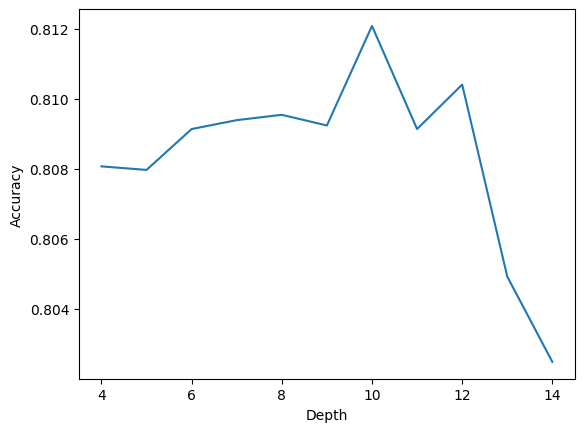

The best depth is :  10


In [31]:
def findBestDepth(training_data_set, testing_data_set):

    best_depth = 0
    accuracies = []
    depths = [i for i in range(4, 15)]
    curr_depth = 4
    best_Acc = 0

    # Training part
    X_train = training_data_set.drop(['raint'], axis=1).values
    y_train = training_data_set['raint'].values
    
    # Testing part
    X_test = testing_data_set.drop(['raint'], axis=1).values
    y_test = testing_data_set['raint'].values

    for i in range(11):
        
        clf = DecisionTreeClassifier(max_depth=curr_depth)
        
        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)

        acc = accuracy(y_pred, y_test)
        accuracies.append(acc)

        if acc > best_Acc:
            best_Acc = acc
            best_depth = curr_depth

        curr_depth += 1

    plt.plot(depths, accuracies)
    plt.xlabel("Depth")
    plt.ylabel("Accuracy")
    plt.show()

    return best_depth

best_depth = findBestDepth(training_data_set, testing_data_set)
print("The best depth is : ", best_depth)

In [32]:
# Now doing sklearn part

def fromSklearn(training_data_set, testing_data_set, best_depth):
    
    X_train = training_data_set.drop(['raint'], axis=1).values
    X_test = testing_data_set.drop(['raint'], axis=1).values
    y_train = training_data_set['raint'].values
    y_test = testing_data_set['raint'].values

    clf = DecisionTreeClassifier(criterion='entropy', max_depth= best_depth, min_samples_split=4)
    clf.fit(X_train, y_train)

    y_pred1 = clf.predict(X_train)
    print("Training Accuracy (sklearn): ", accuracy(y_train, y_pred1))

    y_pred2 = clf.predict(X_test)
    print("Testing Accuracy (sklearn): ", accuracy(y_test, y_pred2))

    # classificationReport(y_test, y_pred2)
    return clf

skl_clf = fromSklearn(training_data_set, testing_data_set, best_depth)

Training Accuracy (sklearn):  0.8159926844137371
Testing Accuracy (sklearn):  0.8115316230632461


In [41]:
# Now doing the pruning part

def reduced_error_pruning(training_data_set, testing_data_set):

    X_train = training_data_set.drop(['raint'], axis=1).values
    X_test = testing_data_set.drop(['raint'], axis=1).values
    y_train = training_data_set['raint'].values
    y_test = testing_data_set['raint'].values

    curr_acc = 0
    curr_depth = 11

    while curr_depth >= 3:

        clf = DecisionTree(max_depth=curr_depth)
        clf.fit_data(X_train, y_train)
        
        y_pred = clf.predict(X_test)

        acc = accuracy(y_test, y_pred)
        # print(acc)

        if acc > curr_acc:
            curr_acc = acc
        else:
            break
    
        curr_depth -= 1

    returning_object = [curr_depth, y_pred, curr_acc]
    return returning_object

returning_object = reduced_error_pruning(training_data_set, testing_data_set)
print("With out sklearn (accuracy): ", returning_object[2])
    

0.8086360172720345
0.8103632207264414
0.808737617475235
With out sklearn (accuracy):  0.8103632207264414


In [53]:
def pruning_sklearn(training_data_set, testing_data_set):
    X_train = training_data_set.drop(['raint'], axis=1).values
    X_test = testing_data_set.drop(['raint'], axis=1).values
    y_train = training_data_set['raint'].values
    y_test = testing_data_set['raint'].values

    curr_acc = 0
    curr_depth = 9
    clf_prune = None

    while curr_depth >= 3:
        clf = DecisionTreeClassifier(criterion='entropy', max_depth=curr_depth)
        clf.fit(X_train, y_train)
        
        y_pred = clf.predict(X_test)

        acc = accuracy(y_test, y_pred)
        print(acc)

        if acc > curr_acc:
            curr_acc = acc
            clf_prune = clf
        else:
            break
    
        curr_depth -= 1
    
    return clf_prune, curr_acc

clf_prune, prun_Acc = pruning_sklearn(training_data_set, testing_data_set)

print("With sklearn (accuracy): ", prun_Acc)

0.808737617475235
0.8106680213360427
0.8091440182880366
With sklearn (accuracy):  0.8106680213360427


In [55]:
print(f"On Entire Data Set\nWith out pruning: {avg_accuracy}\nWithour pruning: {returning_object[2]}")

On Entire Data Set
With out pruning: 0.803728727457455
Withour pruning: 0.8103632207264414


In [47]:
# Now doing the 3rd part

def classificationReport(testing_data_set, d_tree, prune_pred):
    from sklearn.metrics import classification_report

    y_test = testing_data_set['raint'].values
    X_test = testing_data_set.drop(['raint'], axis=1).values

    # d_tree = DecisionTree(max_depth=5)
    # d_tree.fit_data(X_train, y_train)
    
    y_pred = d_tree.predict(X_test)
    print("Classification report (without pruning):-\n",classification_report(y_test, y_pred))

    print("\nClassification report (with pruning):-\n", classification_report(y_test, prune_pred))

classificationReport(testing_data_set, d_tree, returning_object[1])

Classification report (without pruning):-
               precision    recall  f1-score   support

           0       0.84      0.94      0.88     15364
           1       0.61      0.35      0.44      4321

    accuracy                           0.81     19685
   macro avg       0.72      0.64      0.66     19685
weighted avg       0.79      0.81      0.79     19685


Classification report (with pruning):-
               precision    recall  f1-score   support

           0       0.85      0.92      0.88     15364
           1       0.59      0.40      0.48      4321

    accuracy                           0.81     19685
   macro avg       0.72      0.66      0.68     19685
weighted avg       0.79      0.81      0.79     19685



In [50]:
# Now doing 4th part ie. Visulization to plot the graph
def plotTree(clf, file_name):
    fig = plt.figure(figsize=(120, 120))
    p = tree.plot_tree(
        clf,
        filled=True,
        feature_names=training_data_set.drop(['raint'], axis=1).columns.to_list(),
        class_names=('low', 'high')
    )
    fig.savefig(file_name)

plotTree(skl_clf, "tree.png")

In [51]:
# Plot tree with pruning
plotTree(clf_prune, "tree2.png")